# Quora Insincere Questions Classification Using Neural Networks and Deep Learning Models
Outline:
1. Dowload data from Kaggle to google Colab

2. Prepare the data for Modeling using the TF-IDF Technique

3. Train a deep learning model using `PyTorch` package

## Download Data from Kaggle

In [1]:
!ls

kaggle.json  sample_data


In [2]:
!pwd

/content


In [3]:
import os

In [4]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [5]:
!kaggle competitions download -c quora-insincere-questions-classification -f train.csv -p data
!kaggle competitions download -c quora-insincere-questions-classification -f test.csv -p data
!kaggle competitions download -c quora-insincere-questions-classification -f sample_submission.csv -p data

  0% 0.00/54.9M [00:00<?, ?B/s]
100% 54.9M/54.9M [00:00<00:00, 863MB/s]
  0% 0.00/15.8M [00:00<?, ?B/s]
100% 15.8M/15.8M [00:00<00:00, 1.07GB/s]
  0% 0.00/4.09M [00:00<?, ?B/s]
100% 4.09M/4.09M [00:00<00:00, 719MB/s]


In [6]:
train_fname = 'data/train.csv.zip'
test_fname = 'data/test.csv.zip'
sample_fname = 'data/sample_submission.csv.zip'

In [7]:
import pandas as pd

In [8]:
raw_df = pd.read_csv(train_fname)
test_df = pd.read_csv(test_fname)
sub_df = pd.read_csv(sample_fname)

In [9]:
raw_df

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [10]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [11]:
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [12]:
raw_df.sample(10)

,qid,question_text,target
432736,54d059f05c9cd5c45e7e,How many different antigens/pathogen species c...,0
480561,5e1b1c19cc83964da4f7,How can I convince my mom that I´m responsible...,0
293881,398bc9351ad40e9cf175,What is the average a startup should pay their...,0
829994,a2a8e531aa1f134db26e,"If you had to design a Star Wars fleet, what s...",0
1006118,c529c517d8f16384d1d7,How did Marc Anthony become an actor?,0
798966,9c8e9fe499671849ed49,Can you get secondhand smoke from crank?,0
753390,939b8cb0a70ee8d82dca,What's the scope of biotechnology?,0
945819,b957e5de9e74f6f60daa,Whats your favorite store?,0
173733,21f8b2a3f775f2640e53,What is the best way to learn figer style?,0
829795,a2a02a8a78a1ed0c0a02,Why does my grandmother think the movie theate...,0


## Data Exploration

In [13]:
SAMPLE_SIZE = 100_000
sample_df = raw_df.sample(SAMPLE_SIZE)

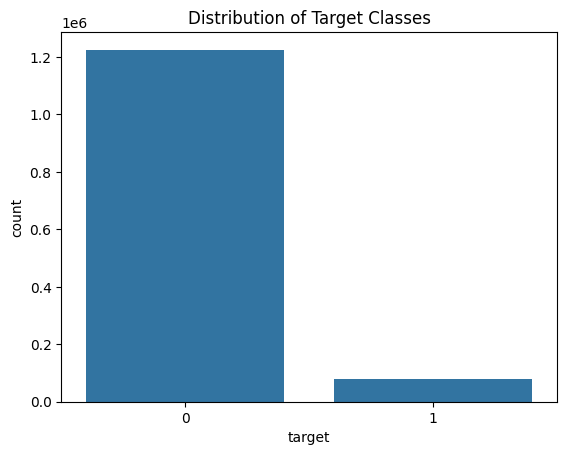

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=raw_df)
plt.title('Distribution of Target Classes')
plt.show()

In [153]:
# Add character count column if not already added
raw_df['char_count'] = raw_df['question_text'].apply(len)

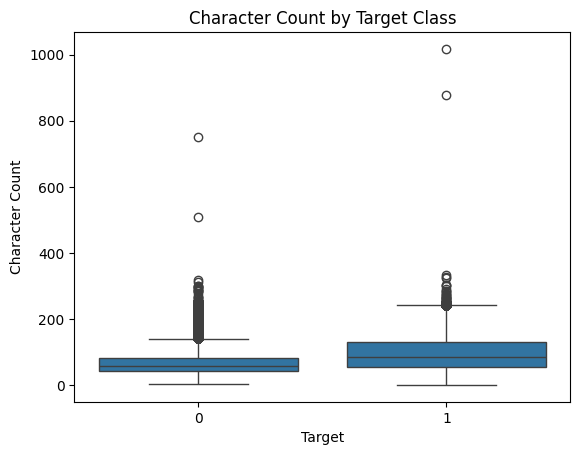

In [154]:
# Box plot of character count by target class
sns.boxplot(x='target', y='char_count', data=raw_df)
plt.title('Character Count by Target Class')
plt.xlabel('Target')
plt.ylabel('Character Count')
plt.show()


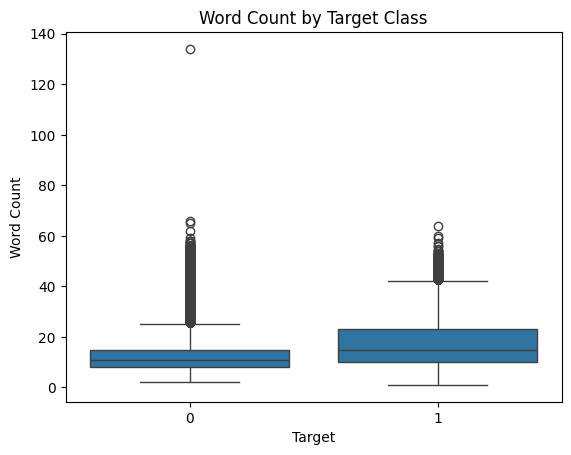

In [155]:
# Add word count column
raw_df['word_count'] = raw_df['question_text'].apply(lambda x: len(x.split()))

# Box plot of word count
sns.boxplot(x='target', y='word_count', data=raw_df)
plt.title('Word Count by Target Class')
plt.xlabel('Target')
plt.ylabel('Word Count')
plt.show()


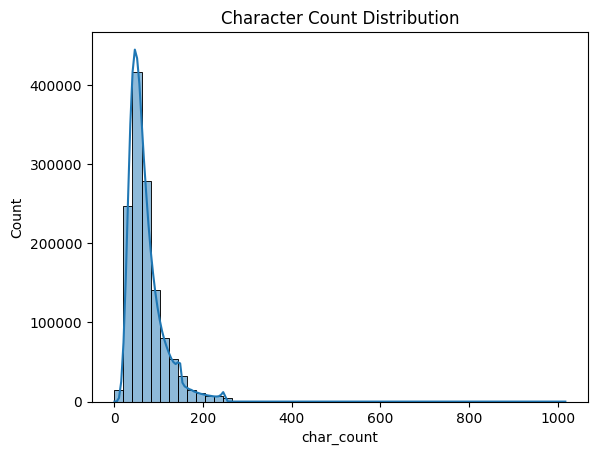

In [151]:
raw_df.char_count = raw_df['question_text'].apply(len)
raw_df.word_count = raw_df['question_text'].apply(lambda x: len(x.split()))

# Plot distributions
sns.histplot(raw_df.char_count, bins=50, kde=True)
plt.title('Character Count Distribution')
plt.show()


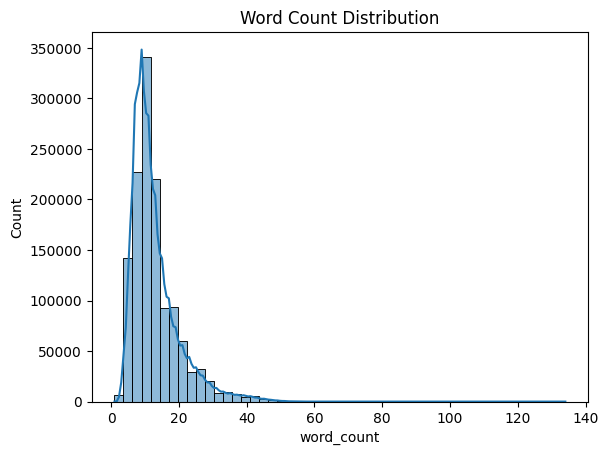

In [152]:
sns.histplot(raw_df.word_count, bins=50, kde=True)
plt.title('Word Count Distribution')
plt.show()

In [129]:
from collections import Counter
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def get_top_n_words(corpus, n=None):
    words = ' '.join(corpus).lower().split()
    words = [word for word in words if word not in stop_words]
    return Counter(words).most_common(n)

top_words = get_top_n_words(sample_df['question_text'], n=20)
print(top_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('best', 4772), ('get', 4730), ('would', 4622), ('people', 3788), ('like', 3268), ('good', 2760), ('one', 2351), ('make', 2087), ('think', 1979), ('many', 1897), ('much', 1655), ('someone', 1544), ('use', 1512), ('want', 1443), ('way', 1443), ('know', 1430), ('take', 1381), ('find', 1338), ('ever', 1326), ('become', 1315)]


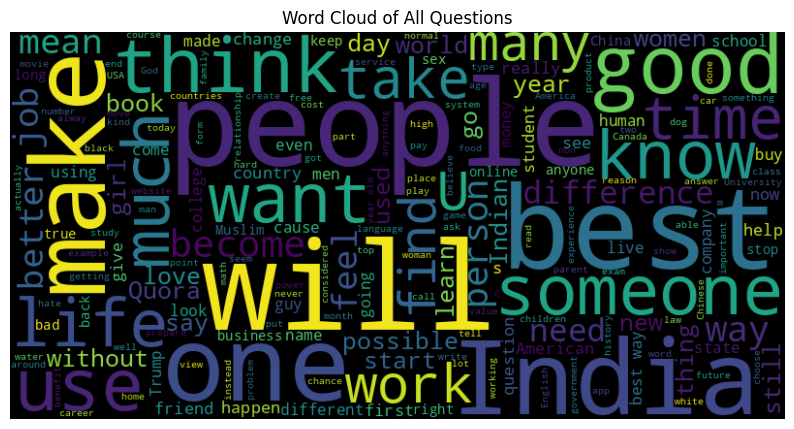

In [134]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400).generate(' '.join(sample_df['question_text']))
plt.figure(figsize=(10, 11))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of All Questions")
plt.show()


In [143]:
raw_df.question_mark = sample_df['question_text'].apply(lambda x: '?' in x)
raw_df

,qid,question_text,target,char_count,word_count
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,72,13
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,81,16
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,67,10
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,57,9
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,77,15
...,...,...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0,93,17
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0,91,19
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0,25,4
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0,71,13


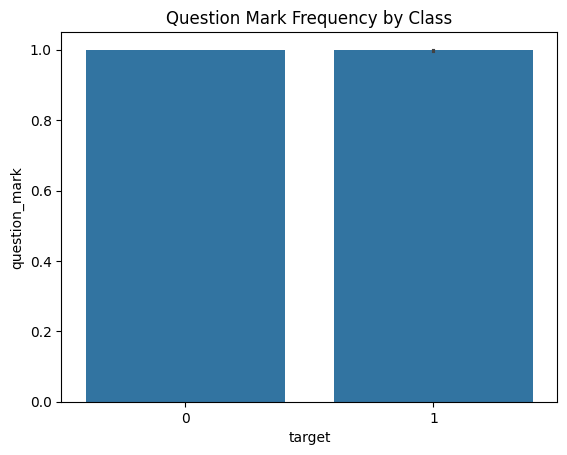

In [150]:
# Presence of question mark
raw_df['question_mark'] = raw_df['question_text'].apply(lambda x: '?' in x)

sns.barplot(x='target', y='question_mark', data=raw_df)
plt.title('Question Mark Frequency by Class')
plt.show()


In [14]:
sample_df

,qid,question_text,target
830442,a2bd8cc810aeddd8702d,What happens if a pregnant woman is convicted ...,0
747805,927f1009fabd2ce47673,Which is your favourite color?,0
1014912,c6e1f621c0dc7266d4a1,What's the reason behind the decline in Arabic...,0
451477,586da50a3d0d1fcf5da5,"Why does the Wifi keep getting disconnected, w...",1
551313,6c04a7885981434e8c64,What is the kindest thing a teacher has done f...,0
...,...,...,...
1200082,eb349ab901d6f7623823,Is there something wrong with this sentence? T...,0
1045587,cce454c23eae803366b2,How do I learn stuff and and concentrate on my...,0
597917,751dfb61921ffd692547,Do American parents expect their school-age ki...,0
1218741,eedcc3037c302503a2b9,Since Africans attacked Europe and enslaved Eu...,1


In [15]:
sample_df.target.value_counts(normalize=True)

,proportion
target,
0,0.93813
1,0.06187


## Prepare the Data for Training
- Convert text to TF-IDF Vectors

- Convert Vectors to PyyTorch tensors

- Create PyTorch Data Loaders

### Convert text to TF-IDF

In [26]:
import nltk

In [27]:
 nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [35]:
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

In [30]:
stemmer = SnowballStemmer(language='english')

In [32]:
stemmer.stem('going')

'go'

In [33]:
def tokenize(text):
  return[stemmer.stem(token) for token in word_tokenize(text) ]

In [34]:
tokenize('This is a set of butterfries unexpectedily!')

['this', 'is', 'a', 'set', 'of', 'butterfri', 'unexpectedili', '!']

In [25]:
word_tokenize('This is something very new () in the field of data analysis.')

['This',
 'is',
 'something',
 'very',
 'new',
 '(',
 ')',
 'in',
 'the',
 'field',
 'of',
 'data',
 'analysis',
 '.']

In [37]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [38]:
english_stopwords = stopwords.words('english')

In [39]:
','.join(english_stopwords)

"a,about,above,after,again,against,ain,all,am,an,and,any,are,aren,aren't,as,at,be,because,been,before,being,below,between,both,but,by,can,couldn,couldn't,d,did,didn,didn't,do,does,doesn,doesn't,doing,don,don't,down,during,each,few,for,from,further,had,hadn,hadn't,has,hasn,hasn't,have,haven,haven't,having,he,he'd,he'll,her,here,hers,herself,he's,him,himself,his,how,i,i'd,if,i'll,i'm,in,into,is,isn,isn't,it,it'd,it'll,it's,its,itself,i've,just,ll,m,ma,me,mightn,mightn't,more,most,mustn,mustn't,my,myself,needn,needn't,no,nor,not,now,o,of,off,on,once,only,or,other,our,ours,ourselves,out,over,own,re,s,same,shan,shan't,she,she'd,she'll,she's,should,shouldn,shouldn't,should've,so,some,such,t,than,that,that'll,the,their,theirs,them,themselves,then,there,these,they,they'd,they'll,they're,they've,this,those,through,to,too,under,until,up,ve,very,was,wasn,wasn't,we,we'd,we'll,we're,were,weren,weren't,we've,what,when,where,which,while,who,whom,why,will,with,won,won't,wouldn,wouldn't,y,you,you'd,you

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
vectorizer = TfidfVectorizer(tokenizer=tokenize, stop_words=english_stopwords, max_features=1000)

In [43]:
sample_df.question_text

,question_text
830442,What happens if a pregnant woman is convicted ...
747805,Which is your favourite color?
1014912,What's the reason behind the decline in Arabic...
451477,"Why does the Wifi keep getting disconnected, w..."
551313,What is the kindest thing a teacher has done f...
...,...
1200082,Is there something wrong with this sentence? T...
1045587,How do I learn stuff and and concentrate on my...
597917,Do American parents expect their school-age ki...
1218741,Since Africans attacked Europe and enslaved Eu...


In [44]:
%%time
vectorizer.fit(sample_df.question_text)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'m", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn(


CPU times: user 27.8 s, sys: 89.4 ms, total: 27.9 s
Wall time: 28.2 s


TfidfVectorizer(max_features=1000,
                stop_words=['a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...],
                tokenizer=<function tokenize at 0x7c5f25a4c400>)

In [45]:
vectorizer.get_feature_names_out()[:100]

array(['!', '$', '%', '&', "'", "''", "'m", "'s", '(', ')', ',', '-', '.',
       '1', '10', '100', '12', '12th', '15', '2', '20', '2017', '2018',
       '3', '30', '4', '5', '6', '7', '8', ':', '?', '[', ']', '``',
       'abl', 'abus', 'accept', 'access', 'accomplish', 'accord',
       'account', 'achiev', 'acid', 'act', 'action', 'activ', 'actor',
       'actual', 'ad', 'add', 'address', 'admiss', 'adult', 'advanc',
       'advantag', 'advic', 'affect', 'africa', 'african', 'age', 'ago',
       'air', 'allow', 'almost', 'alon', 'along', 'alreadi', 'also',
       'alway', 'amazon', 'america', 'american', 'among', 'amount',
       'android', 'ani', 'anim', 'anoth', 'answer', 'anyon', 'anyth',
       'apart', 'app', 'appear', 'appl', 'appli', 'applic', 'approach',
       'arab', 'area', 'armi', 'around', 'art', 'asian', 'ask', 'associ',
       'atheist', 'attack', 'attract'], dtype=object)

## Transform the questionsin to Vectors

In [46]:
%%time
inputs = vectorizer.transform(sample_df.question_text)

CPU times: user 30.8 s, sys: 57.4 ms, total: 30.9 s
Wall time: 37.6 s


In [47]:
inputs.shape

(100000, 1000)

In [48]:
inputs

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 548137 stored elements and shape (100000, 1000)>

In [50]:
inputs[0].toarray()[:2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.06963724, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [52]:
%%time
test_inputs = vectorizer.transform(test_df.question_text)

CPU times: user 1min 34s, sys: 272 ms, total: 1min 35s
Wall time: 1min 35s


In [53]:
test_inputs.shape

(375806, 1000)

## Split the Training and Validation Sets

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
targets = sample_df.target

In [57]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs, targets, test_size=0.3)

In [58]:
train_inputs.shape

(70000, 1000)

In [59]:
val_inputs.shape

(30000, 1000)

In [60]:
train_targets

,target
289403,0
799780,0
476021,0
538854,1
1037774,0
...,...
224885,0
561502,0
850920,0
194151,0


In [61]:
val_targets

,target
1229863,0
1133920,0
581216,0
1271173,0
369516,0
...,...
667353,0
240245,0
141273,0
642007,0


## Convert to PyTorch Tensors

In [62]:
import torch

In [64]:
#convert from a sparse matrix to numpy array using the command .toarray() and converting to float
train_input_tensors = torch.tensor(train_inputs.toarray()).float()
val_input_tensors = torch.tensor(val_inputs.toarray()).float()

In [69]:
train_input_tensors

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [66]:
train_input_tensors.shape

torch.Size([70000, 1000])

In [67]:
val_input_tensors

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [68]:
val_input_tensors.shape

torch.Size([30000, 1000])

In [71]:
# convert from pandas series to numpy array using the command .values
train_target_tensors = torch.tensor(train_targets.values).float()
val_target_tensors = torch.tensor(val_targets.values).float()

In [72]:
test_inputs_tensors = torch.tensor(test_inputs.toarray()).float()

## Create PyTorch Data Loaders

In [73]:
from torch.utils.data import TensorDataset, DataLoader

In [74]:
train_ds = TensorDataset(train_input_tensors, train_target_tensors)
val_ds = TensorDataset(val_input_tensors, val_target_tensors)
test_ds = TensorDataset(train_input_tensors)

In [75]:
train_ds[:10]

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]))

In [76]:
BATCH_SIZE = 128

In [77]:
train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=BATCH_SIZE)
test_dl = DataLoader(test_ds, batch_size=BATCH_SIZE)

In [78]:
for batch in train_dl:
  batch_inputs = batch[0]
  batch_targets = batch[1]
  print('batch_inputs.shape', batch_inputs.shape)
  print('batch_targets.shape', batch_targets.shape)
  break

batch_inputs.shape torch.Size([128, 1000])
batch_targets.shape torch.Size([128])


In [79]:
len(train_dl)

547

In [ ]:
# about 547 batches in the data loader

## Train Deep Learning Model

In [117]:
import torch.nn as nn
import torch.nn.functional as F

In [118]:
from sklearn.metrics import accuracy_score, f1_score

In [89]:
class QuoraNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(1000, 512)
    self.layer2 = nn.Linear(512, 256)
    self.layer3 = nn.Linear(256, 128)
    self.layer4 = nn.Linear(128, 1)
    pass
  def forward(self, inputs):
    out = self.layer1(inputs)
    out = F.relu(out)
    out = self.layer2(out)
    out = F.relu(out)
    out = self.layer3(out)
    out = F.relu(out)
    out = self.layer4(out)
    return out


In [108]:
model = QuoraNet()

In [121]:
for batch in train_dl:
  bi, bt = batch
  print('inputs.shape', bi.shape)
  print('targets.shape', bt.shape)

  bo = model(bi)
  print('bo.shape', bo.shape)

  # convert outputs to probabilities
  probs = torch.sigmoid(bo[:,0])
  print('probs', probs[:10])

  #convert probs to predictions
  preds = (probs > 0.5).int()
  print('preds', preds[:10])
  print('batch_targets', bt[:10])

   # check the metrics
  print('Accuracy score', accuracy_score(bt, preds))
  print('F1 score', f1_score(bt, preds))

  break

inputs.shape torch.Size([128, 1000])
targets.shape torch.Size([128])
bo.shape torch.Size([128, 1])
probs tensor([0.5077, 0.5076, 0.5074, 0.5074, 0.5073, 0.5071, 0.5073, 0.5074, 0.5072,
        0.5075], grad_fn=<SliceBackward0>)
preds tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=torch.int32)
batch_targets tensor([1., 0., 1., 0., 0., 0., 0., 0., 0., 0.])
Accuracy score 0.046875
F1 score 0.08955223880597014


In [95]:
bi[:10]

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [96]:
bi.shape

torch.Size([128, 1000])

In [94]:
bt[:10]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [97]:
bt.shape

torch.Size([128])

In [93]:
bo[:10]

tensor([[-0.0647],
        [-0.0647],
        [-0.0648],
        [-0.0653],
        [-0.0652],
        [-0.0651],
        [-0.0657],
        [-0.0644],
        [-0.0671],
        [-0.0648]], grad_fn=<SliceBackward0>)

In [98]:
bo.shape

torch.Size([128, 1])